## EP with dimension reduction

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
train = pd.read_csv("train.csv")
features = train.columns[1:]
X = train[features]
X= X.as_matrix()
y = train['label']
y = y.as_matrix()
X, x, Y, y = model_selection.train_test_split(X,y,test_size=0.1,random_state=0)
print X.shape

N = X.shape[0]
d = X.shape[1]+1

data = X
data = np.hstack((np.ones([data.shape[0],1]),data))

for i in range (0, len(Y)):
    if Y[i] != 0:
        Y[i] = 1
        
y = Y

(37800, 784)


In [8]:
import copy
from itertools import izip
from math import sqrt
import numpy as np
from operator import mul
import matplotlib.mlab as mlab
from scipy.stats import bernoulli, norm
from scipy import optimize, stats
import matplotlib.pyplot as plt
from matplotlib.mlab import bivariate_normal
from scipy import integrate
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.utils import shuffle
from sklearn import linear_model, datasets
import time
%matplotlib inline 
plt.style.use('ggplot')

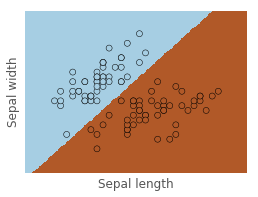

ovr
[-91.29290343]
[[ 34.89577629 -30.7007771 ]]


In [9]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
X = X[0:100]
Y = Y[0:100]
h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


print logreg.multi_class
print logreg.intercept_
print logreg.coef_

In [10]:
d = 3
N = 100
tol = 10**4

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

def ll(x, y, mu, sig):
    if sig < 0:
        sig = -sqrt(-sig)
    else:
        sig = sqrt(sig)
        
    et = np.exp(x)
    z = np.log(et / (1 + et))
    e = y*z + (1-y)*np.log(1-et / (1 + et)) + np.log(gaussian(x, mu, (sig)))
    return e

In [12]:
iris = datasets.load_iris()
X = iris.data[:, 0:1]  # we only take the first two features.
Y = iris.target
X = X[0:100]
Y = Y[0:100]
data = X
y = Y
data.sort()
print y
print data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 5.1]
 [ 4.9]
 [ 4.7]
 [ 4.6]
 [ 5. ]
 [ 5.4]
 [ 4.6]
 [ 5. ]
 [ 4.4]
 [ 4.9]
 [ 5.4]
 [ 4.8]
 [ 4.8]
 [ 4.3]
 [ 5.8]
 [ 5.7]
 [ 5.4]
 [ 5.1]
 [ 5.7]
 [ 5.1]
 [ 5.4]
 [ 5.1]
 [ 4.6]
 [ 5.1]
 [ 4.8]
 [ 5. ]
 [ 5. ]
 [ 5.2]
 [ 5.2]
 [ 4.7]
 [ 4.8]
 [ 5.4]
 [ 5.2]
 [ 5.5]
 [ 4.9]
 [ 5. ]
 [ 5.5]
 [ 4.9]
 [ 4.4]
 [ 5.1]
 [ 5. ]
 [ 4.5]
 [ 4.4]
 [ 5. ]
 [ 5.1]
 [ 4.8]
 [ 5.1]
 [ 4.6]
 [ 5.3]
 [ 5. ]
 [ 7. ]
 [ 6.4]
 [ 6.9]
 [ 5.5]
 [ 6.5]
 [ 5.7]
 [ 6.3]
 [ 4.9]
 [ 6.6]
 [ 5.2]
 [ 5. ]
 [ 5.9]
 [ 6. ]
 [ 6.1]
 [ 5.6]
 [ 6.7]
 [ 5.6]
 [ 5.8]
 [ 6.2]
 [ 5.6]
 [ 5.9]
 [ 6.1]
 [ 6.3]
 [ 6.1]
 [ 6.4]
 [ 6.6]
 [ 6.8]
 [ 6.7]
 [ 6. ]
 [ 5.7]
 [ 5.5]
 [ 5.5]
 [ 5.8]
 [ 6. ]
 [ 5.4]
 [ 6. ]
 [ 6.7]
 [ 6.3]
 [ 5.6]
 [ 5.5]
 [ 5.5]
 [ 6.1]
 [ 5.8]
 [ 5. ]
 [ 5.6]
 [ 5.7]
 [ 5.7]
 [ 6.2]
 [ 5.1]
 [ 5

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[-2.60373147  0.74348327]
14.1981121787


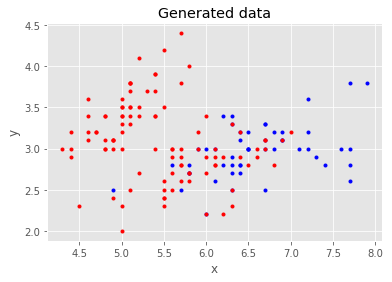

In [13]:
other_label = 0
def generate_class_data():
    # create data set 
    np.random.seed(0)
    n_samples = 100

    # Gaussian mean=0, variance=1
    data = np.random.randn(n_samples,1)

    # seperate shifting them 1 away
    data[0:50] = data[0:50] + 1
    #data[0:250] = data[0:250] - 2

    # define labels
    y = other_label*np.ones(100)
    y[0:50] = 1
    return data, y


data, y = generate_class_data()

# iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
#X = X[0:100]
#Y = Y[0:100]

for i in range(0, len(Y)):
    if i>99:
        Y[i] = 0
    else: 
        Y[i] = 1
data = X
y = Y
#print X
print Y
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(data, y)
w_true = logreg.coef_[0]
w0_true = logreg.intercept_[0]
print w_true
print w0_true
plt.plot(data[y==other_label,0],data[y==other_label,1],"bo", markersize = 3)
plt.plot(data[y==1,0],data[y==1,1],"ro", markersize = 3)
#plt.plot(data[y==other_label],data[y==other_label],"bo", markersize = 3)
#plt.plot(data[y==1],data[y==1],"ro", markersize = 3)
plt.title("Generated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

data = np.hstack((np.ones([data.shape[0],1]),data))
data, y = shuffle(data, y, random_state=0)
#print y
#print data
d = 3
N = 100

In [14]:
def project_subspace(Xi, mu, sig, Mi, Vi):
    
    XT = Xi[:,None] #Xi.T
    X = Xi[None,:] #Xi
    
    # project cavity on 1D subspace
    scalar_moment = np.linalg.inv(X.dot(sig).dot(XT))
    scalar_moment2 = X.dot(mu)
    
    
    V_cavity = 1/(scalar_moment - 1/Vi)
    M_cavity = V_cavity * (scalar_moment * scalar_moment2 - Mi/Vi)

    return M_cavity[0][0], V_cavity[0][0]


def compute_cavity1(Xi, r_i, A_i, r, A):
    

    XT = Xi[:,None] #Xi.T
    X = Xi[None,:] #Xi
    
    scalar_moment = np.linalg.inv(X.dot(A).dot(XT))
    scalar_moment2 = X.dot(np.linalg.inv(A).dot(r))
    
    Mi = X.dot( np.linalg.inv(A_i).dot(r_i) )
    Vi = X.dot((np.linalg.inv(A_i))).dot(XT)

    V_cavity = np.linalg.inv( scalar_moment - 1/Vi )
    
    M_cavity = V_cavity * ( scalar_moment*scalar_moment2 -  Mi/Vi)
    
    return M_cavity[0][0], V_cavity[0][0]

Xi = np.array([1,1])
presmui = np.array([2,1])
presi = np.array([[1, 0.5], [1,1]])
pres_mu = np.array([0.5,1.2])
pres = np.array([[1.3, 1.5], [1.7,1.3]])


cavity_M, cavity_V = compute_cavity1(Xi, presmui, presi, pres_mu, pres)
print cavity_M, cavity_V

1.10174418605 -1.20833333333


In [15]:
def logit_i(x):
    trunc = 8.
    exponent = np.clip(x, -trunc, trunc)
    exponent = np.float64(exponent)
    return  1 / (1 + pow(np.e, -exponent))  
    

def compute_moments(y, M_cavity, V_cavity):
    
    if V_cavity < 0:
        sd = -sqrt(-V_cavity)
    else:
        sd = sqrt(V_cavity)

    lower_bound = M_cavity - 10*sqrt(np.abs(V_cavity))
    upper_bound = M_cavity + 10*sqrt(np.abs(V_cavity))
    
    f = lambda x: gaussian(x, M_cavity, sd) * \
                pow(logit_i(x), y) * pow((1-logit_i(x)), (1 - y))
    E0 = integrate.quad(f, lower_bound, upper_bound)[0]

    f = lambda x: gaussian(x, M_cavity, sd) * \
                pow(logit_i(x), y) * pow((1-logit_i(x)), (1 - y)) * x
    E1 = integrate.quad(f, lower_bound, upper_bound)[0] 
    
    f = lambda x: gaussian(x, M_cavity, sd) * \
                pow(logit_i(x), y) * pow((1-logit_i(x)), (1 - y)) * (x**2)
    E2 = integrate.quad(f, lower_bound, upper_bound)[0] 
    
    if E0 == 0:
        print "WARNING E0 was 0"
        E0 = 0.00000001
        
    M_new = E1 / E0
    V_new = E2 / E0 - (E1 / E0)**2 


    return M_new, V_new



def ll2log(x, y, mu, sig):
    if sig < 0:
        sig = -sqrt(-sig)
    else:
        sig = sqrt(sig)
        
    et = np.exp(x)
    z = np.log(et / (1 + et))
    e = y*z + (1-y)*np.log(1-et / (1 + et)) + np.log(gaussian(x, mu, (sig)))
    return e

#max_x = optimize.minimize(lambda x: -ll2log(x, y[i], M_cavity, V_cavity),  M_cavity)
#M_new = max_x.x[0]
#V_new = max_x.hess_inv[0][0]

In [16]:
def transform_back(Xi, Mi, Vi):
    
    V_inv = 1 / Vi
    
    r = Xi.T * Mi/Vi
    
    XT = Xi[:,None] #Xi.T
    X = Xi[None,:] #Xi
    
    A = V_inv*(XT).dot(X) # legit 
    #A = np.identity(2) * (Xi.T * V_inv).dot(Xi) # spherical
    
    return r, A

transform_back(np.array([1,2.5]), 2, 0.5)

(array([  4.,  10.]), array([[  2. ,   5. ],
        [  5. ,  12.5]]))

In [17]:
def compute_cavity(r_i, A_i, r, A):

    # remove factor
    r_cavity = r - r_i  
    A_cavity = A - A_i

    return r_cavity, A_cavity

def update_post(r_i, A_i, cavity_r, cavity_A):

    r = cavity_r + r_i  
    
    A = cavity_A + A_i
    
    return r, A


In [18]:
def ss_to_cov(r, A):
    if is_invertible(A):
        sig = np.linalg.inv(A)
    else:
        # handle it
        sig = np.linalg.pinv(A)
    #sig = np.linalg.inv(A)
    mu = sig.dot(r)
    
    return mu, sig

def is_invertible(a):
     return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

In [19]:
def plot_projected(M_new, V_new, M_cavity, V_cavity, y):
    
    
    if V_new < 0:
        sd1 = -sqrt(-V_new)
    else:
        sd1 = sqrt(V_new)
    if V_cavity < 0:
        sd2 = -sqrt(-V_cavity)
    else:
        sd2 = sqrt(V_cavity)
        
    x = np.linspace(-10,10,100)    
    
    plt.plot(x, mlab.normpdf(x, M_new, sd1), label="New Aprrox")
    plt.plot(x, mlab.normpdf(x, M_cavity, sd2), label="Cavity/Prior")
    
    
    # parts of approximations
    if V_cavity < 0:
        sd = -sqrt(-V_cavity)
    else:
        sd = sqrt(V_cavity)
    f = lambda x: gaussian(x, M_cavity, sd) * pow(logit_i(x), y) * pow((1-logit_i(x)), (1 - y))
    plt.plot(x, map(f, x), label="Tilted distribution")
    
    f = lambda x: pow(logit_i(x), y) * pow((1-logit_i(x)), (1 - y))
    plt.plot(x, map(f, x), label="Likelihood")
    
    plt.legend()
    plt.show()
    
    
def plot_posterior(m_x, v_x):
    N = 80
    limit = 12
    X = np.linspace(-limit, limit, N)
    Y = np.linspace(-limit, limit, N)
    X, Y = np.meshgrid(X, Y)

    #v_x = -0.5*v_x
    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    z = multivariate_gaussian(pos, m_x, v_x)

    limits = 3
    plt.imshow(z, extent=(-limit, limit, limit, -limit))
    plt.colorbar()
    plt.show()
    
def plot_posterior_1d(r_old, A_old, r_new, A_new, ri, Ai):
    
    
    mu_old, sig_old = ss_to_cov(r_old, A_old)
    mu_new, sig_new = ss_to_cov(r_new, A_new)
    mu_i, sig_i = ss_to_cov(ri, Ai)
    

    x = np.linspace(-150,150,300)
    
    if sig_i[0][0] < 0:
        sdi = -sqrt(-sig_i[0][0])
    else:
        sdi = sqrt(sig_i[0][0])
        
    if sig_i[1][1] < 0:
        sdi2 = -sqrt(-sig_i[1][1])
    else:
        sdi2 = sqrt(sig_i[1][1])
        
    
    plt.plot((w_true, w_true), (0, 1.5), label="target mean")
    plt.plot((w0_true, w0_true), (0, 1.5), label="target mean")
    plt.plot(x, gaussian(x, mu_old[0], sqrt(sig_old[0][0])), label="Old posterior")
    plt.plot(x, gaussian(x, mu_new[0], sqrt(sig_new[0][0])), label="New posterior")
    plt.plot(x, mlab.normpdf(x, mu_i[0], sdi), label="Updated factor")
    
    plt.plot(x, gaussian(x, mu_old[1], sqrt(sig_old[1][1])), label="Old posterior 2")
    plt.plot(x, gaussian(x, mu_new[1], sqrt(sig_new[1][1])), label="New posterior 2")
    plt.plot(x, mlab.normpdf(x, mu_i[1], sdi2), label="Updated factor 2")
    
    plt.legend()
    plt.show()
    
def sanity_check(M_new, V_new, Xi):
    XT = Xi[:,None] #Xi.T
    X = Xi[None,:] #Xi
    
    A = (XT * 1/V_new).dot(X) 
    r = M_new/V_new * Xi
    
    sig = np.linalg.inv(A)
    mu = sig.dot(r)
    
    return mu, sig

def subtract_moments(M, V, M_cavity, V_cavity):
    
    Vi = 1/(1/V - 1/V_cavity)
    Mi = Vi * (M/V - M_cavity/V_cavity)
    
    return Mi, Vi


def project_factor_subspace(Xi, r, A):
    XT = Xi[:,None] #Xi.T
    X = Xi[None,:] #Xi
    
    # invertible check
    if is_invertible(A):
        sig = np.linalg.inv(A)
    else:
        # handle it
        sig = np.linalg.pinv(A)
    #sig = np.linalg.inv(A)
    mu = sig.dot(r)
    
    Mi = X.dot(mu)
    Vi = X.dot(sig).dot(XT)
    
    return Mi, Vi

def plot_posterior_1d_multi(r_old, A_old, r_new, A_new, ri, Ai):
    global d
    
    mu_old, sig_old = ss_to_cov(r_old, A_old)
    mu_new, sig_new = ss_to_cov(r_new, A_new)

    x = np.linspace(-200,200,400)
    match_colors = ["r", "b", "g"]
    for i in range(0, d):
        if i<(d-1):
            plt.plot((w_true[i], w_true[i]), (0, 1.5), color=match_colors[i+1])
        plt.plot(x, gaussian(x, mu_new[i], sqrt(sig_new[i][i])), label=i, color=match_colors[i])
    plt.plot((w0_true, w0_true), (0, 1.5), color=match_colors[0])

    plt.legend()
    plt.show()

In [20]:
# initialise

prior_post = 5000
prior_factor = 10000000
r_new = np.zeros(d)
A_new = np.linalg.inv(np.identity(d) * prior_post) 
  
    

r = [] 
A = []
for i in range(N):
    A.append(1. / prior_factor)
    r.append(0)
    
    
r_old = r_new
A_old = A_new

# max iterations
max_iter = 10

def alt_project(Xi, r, A, ri, Ai):
    
    mu, sig = ss_to_cov(r, A)
    
    A = Xi.dot(sig).dot(Xi.T)
    B = Xi.dot(mu)

    if Ai != A:
        V_i = 1./((1./A)-(Ai))
    else:
        V_i = 1./(1./A)


    if B/A == ri:
        M_i = V_i*(B/A)
    else:
        M_i = V_i * ((1.*B/A) - (1.*ri))
    return M_i, V_i

def project_up(Xi, ri, V_inv):
    
    r = Xi.T * ri
    
    XT = Xi[:,None] #Xi.T
    X = Xi[None,:] #Xi
    
    A = V_inv*(XT).dot(X) # legit 

    return r, A

Iteration  0
[-0.0046991  -0.02725478 -0.01315748]
[-0.0046991  -0.02725478 -0.01315748]


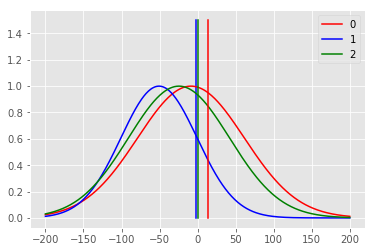

[ 0.01371284  0.08227704  0.03016825]
[ 0.00901374  0.05502227  0.01701077]


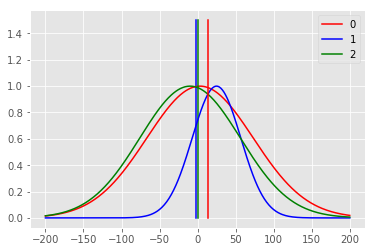

[ 0.00826417  0.04545293  0.03470951]
[ 0.01727791  0.1004752   0.05172028]


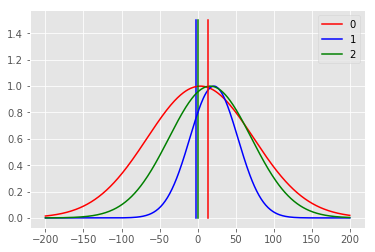

[-0.03121091 -0.22783968 -0.09051165]
[-0.013933   -0.12736448 -0.03879137]


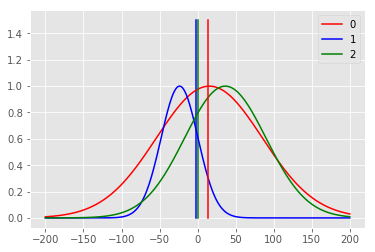

[ 0.0227333   0.11366648  0.07729321]
[ 0.00880029 -0.013698    0.03850183]


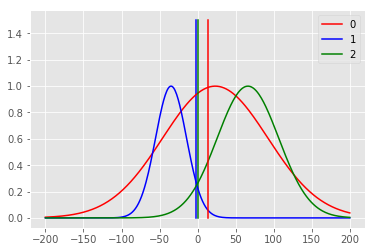

[-0.06613558 -0.41665416 -0.21824742]
[-0.05733529 -0.43035216 -0.17974558]


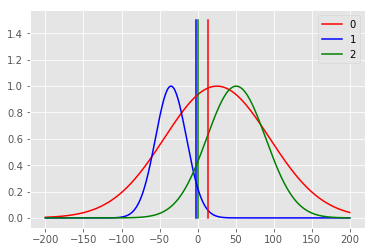

[ 0.03329125  0.16645624  0.11651937]
[-0.02404404 -0.26389592 -0.06322621]


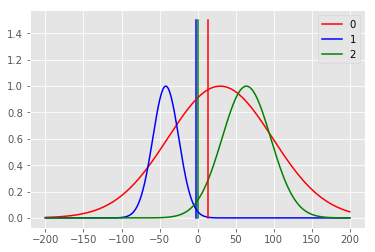

[ 0.1380428   0.92488678  0.42793269]
[ 0.11399876  0.66099086  0.36470648]


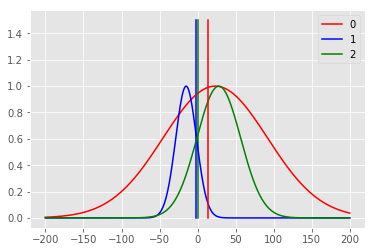

[ 0.12938483  0.87981685  0.36227753]
[ 0.24338359  1.54080771  0.726984  ]


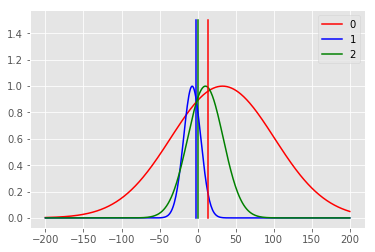

[ 0.03778888  0.23051217  0.10580887]
[ 0.28117247  1.77131988  0.83279287]


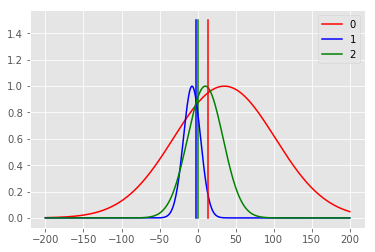

[-0.33328162 -2.03301791 -0.86653222]
[-0.05210915 -0.26169803 -0.03373936]


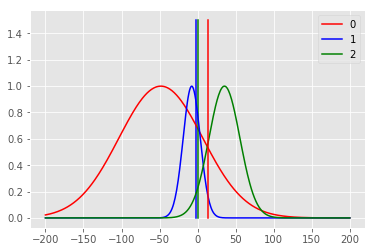

[ 0.06076833  0.38891729  0.19445864]
[ 0.00865917  0.12721926  0.16071929]


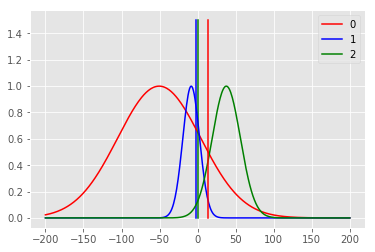

[ 0.22806617  1.39120364  0.63858528]
[ 0.23672534  1.5184229   0.79930456]


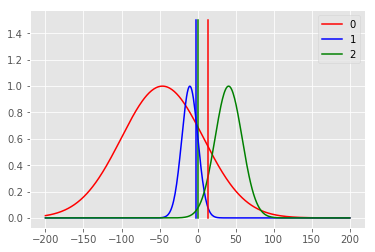

[ 0.31412802  2.04183213  0.87955846]
[ 0.55085336  3.56025502  1.67886302]


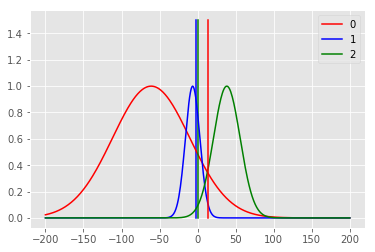

[ 0.05183882  0.31621683  0.15033259]
[ 0.60269219  3.87647185  1.82919561]


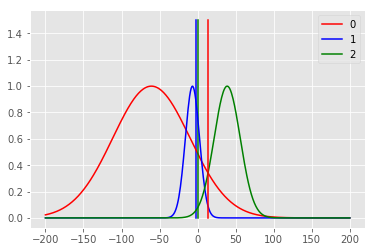

[ 0.033798    0.16561021  0.1047738 ]
[ 0.63649019  4.04208206  1.93396941]


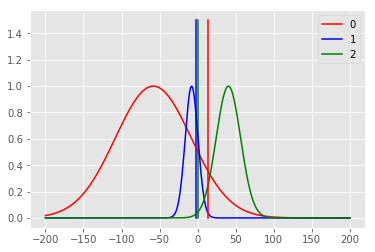

[ 0.03195919  0.19175514  0.09268165]
[ 0.66844938  4.2338372   2.02665106]


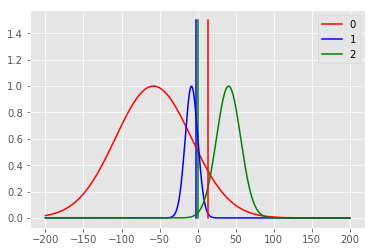

[ 0.21008557  1.15547061  0.54622247]
[ 0.87853495  5.38930781  2.57287354]


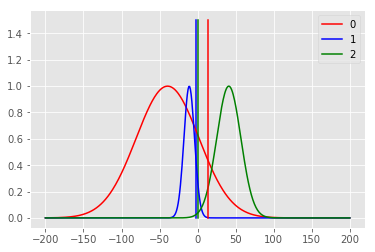

[ 0.01169687  0.056145    0.03509062]
[ 0.89023182  5.44545281  2.60796416]


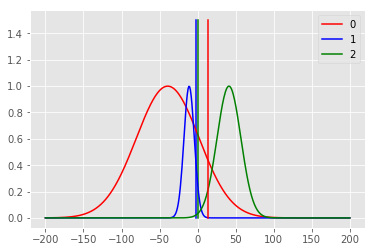

[ 0.00290917  0.01570953  0.01134577]
[ 0.89314099  5.46116233  2.61930993]


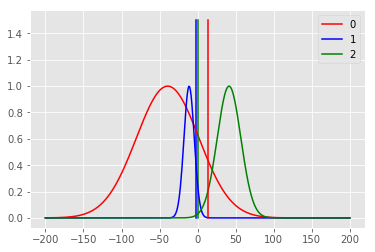

[-0.49735165 -2.78516925 -1.39258463]
[ 0.39578934  2.67599308  1.2267253 ]


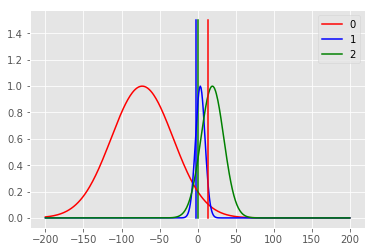

[ 0.18045604  1.01055381  0.54136811]
[ 0.57624538  3.68654689  1.76809341]


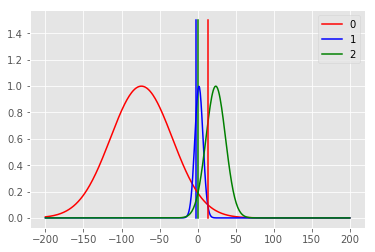

[ 0.0644045   0.30914158  0.21897529]
[ 0.64064987  3.99568847  1.9870687 ]


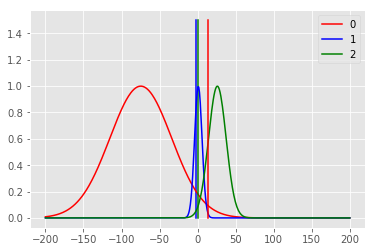

[ 0.16534293  0.7275089   0.4794945 ]
[ 0.8059928   4.72319736  2.4665632 ]


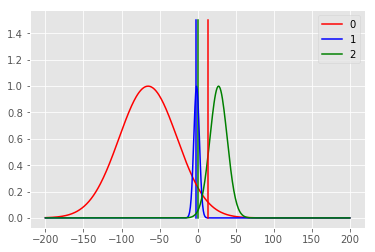

[-0.50183701 -3.11138949 -1.40514364]
[ 0.30415579  1.61180788  1.06141956]


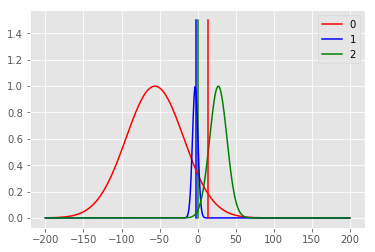

[ 0.01199222  0.05516423  0.04317201]
[ 0.31614801  1.66697211  1.10459157]


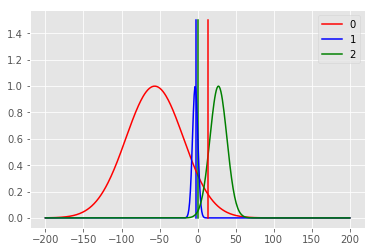

[ 0.00871008  0.04442142  0.03309831]
[ 0.3248581   1.71139353  1.13768988]


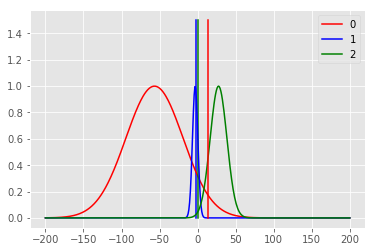

[ 0.26225251  1.62596558  0.76053229]
[ 0.58711061  3.33735911  1.89822217]


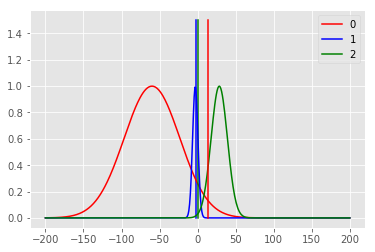

[ 0.4261113   2.13055648  0.98005598]
[ 1.01322191  5.46791559  2.87827815]


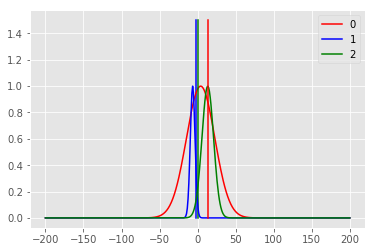

[ 0.02726098  0.13630488  0.09268732]
[ 1.04048288  5.60422047  2.97096547]


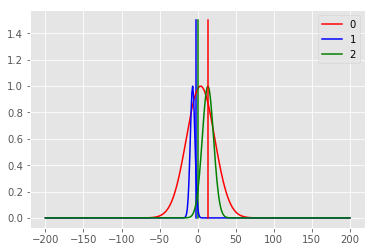

[-0.49983019 -3.1989132  -1.54947358]
[ 0.54065269  2.40530727  1.42149189]


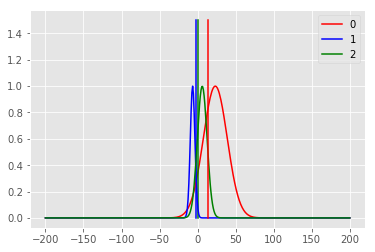

[ 0.12430016  0.67122088  0.37290049]
[ 0.66495286  3.07652815  1.79439238]


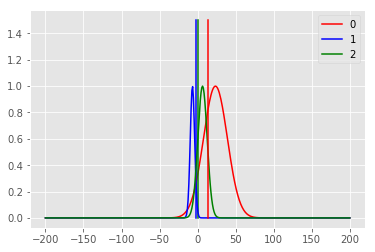

[ 0.07153089  0.3719606   0.2503581 ]
[ 0.73648374  3.44848875  2.04475047]


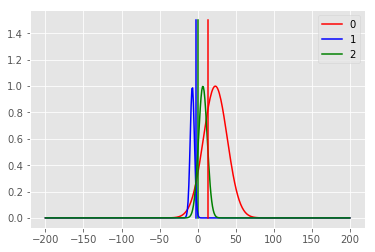

[-0.50106482 -3.05649538 -1.50319445]
[ 0.23541893  0.39199337  0.54155602]


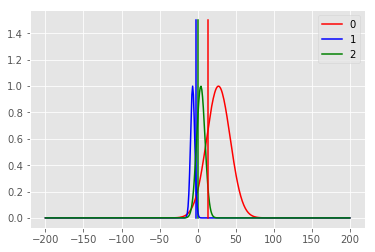

[-0.33091766 -2.11787302 -0.92656945]
[-0.09549873 -1.72587965 -0.38501342]


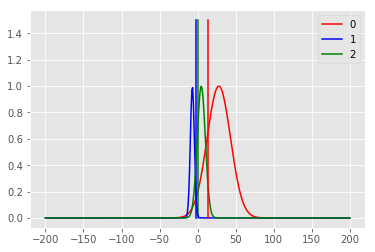

[ 0.13672708  0.71098082  0.36916312]
[ 0.04122835 -1.01489883 -0.0158503 ]


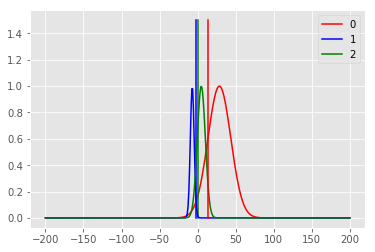

[ 0.14040118  0.80028673  0.53352449]
[ 0.18162953 -0.2146121   0.51767418]


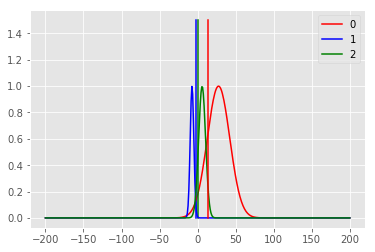

[ 0.49983725  2.99902347  1.34956056]
[ 0.68146677  2.78441138  1.86723475]


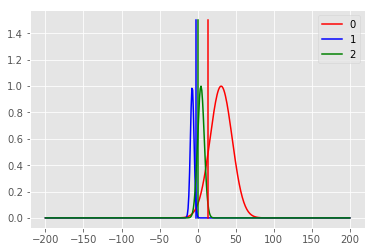

[ 0.3422448   2.01924434  1.02673441]
[ 1.02371158  4.80365572  2.89396916]


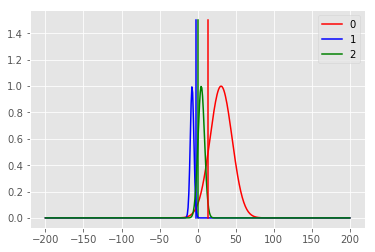

[ 0.43884668  2.54531073  1.14100136]
[ 1.46255826  7.34896645  4.03497052]


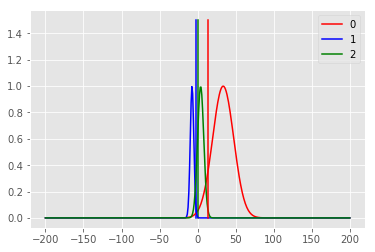

[-0.18629145 -1.26678189 -0.55887436]
[ 1.2762668   6.08218456  3.47609616]


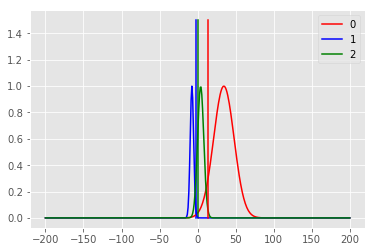

[ 0.015412    0.07243638  0.04931839]
[ 1.2916788   6.15462095  3.52541455]


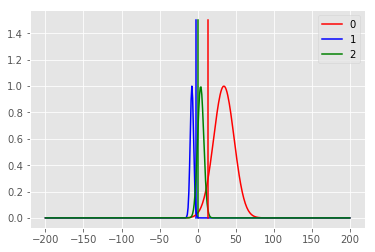

[-0.1527284  -1.05382598 -0.47345805]
[ 1.13895039  5.10079496  3.0519565 ]


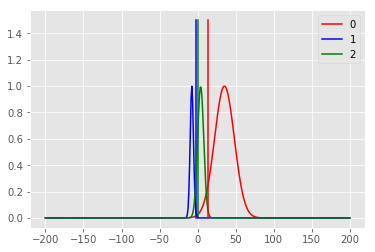

[ 0.03188154  0.15940772  0.11158541]
[ 1.17083194  5.26020269  3.1635419 ]


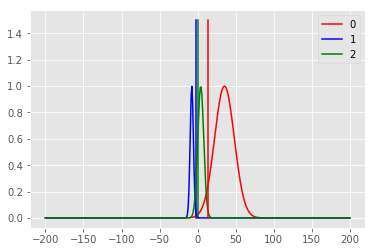

[ 0.0690109   0.37265884  0.25534032]
[ 1.23984284  5.63286153  3.41888222]


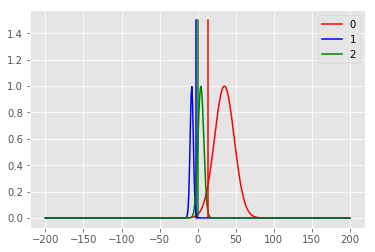

[ 0.17083055  0.85415276  0.3416611 ]
[ 1.41067339  6.48701429  3.76054333]


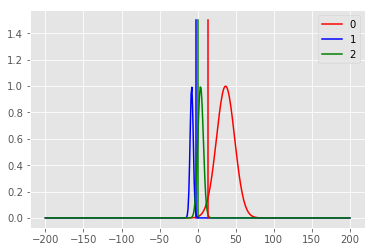

[-0.34858915 -2.26582946 -1.04576744]
[ 1.06208424  4.22118482  2.71477588]


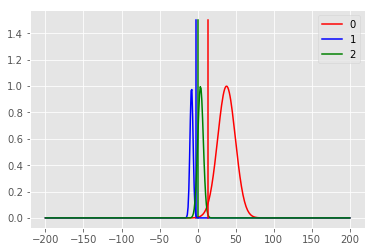

[-0.29598721 -1.98311431 -0.97675779]
[ 0.76609703  2.23807051  1.73801809]


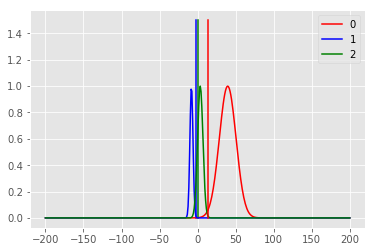

[-0.40636969 -2.43821814 -0.89401332]
[ 0.35972734 -0.20014762  0.84400477]


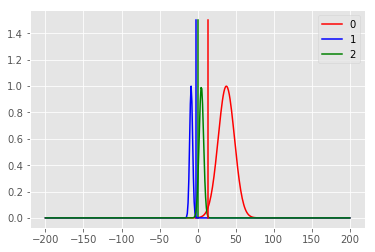

[-0.04610548 -0.30890671 -0.1152637 ]
[ 0.31362186 -0.50905433  0.72874107]


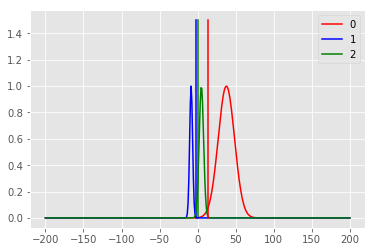

[ 0.29986538  1.67924613  0.74966345]
[ 0.61348724  1.17019179  1.47840452]


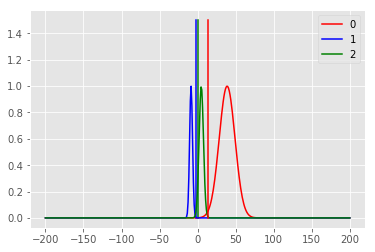

[-0.00219318 -0.01688746 -0.00657953]
[ 0.61129406  1.15330433  1.47182499]


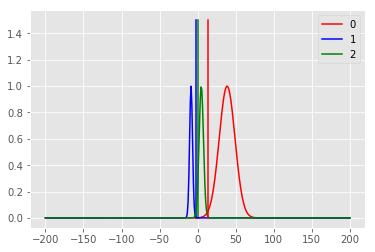

[ 0.4752261   2.99392443  1.56824613]
[ 1.08652016  4.14722876  3.04007112]


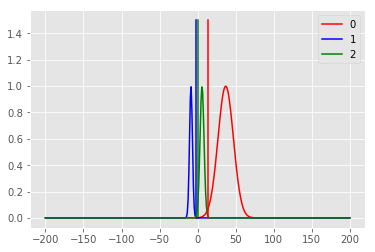

[ 0.26584016  1.46212086  0.63801638]
[ 1.35236032  5.60934963  3.6780875 ]


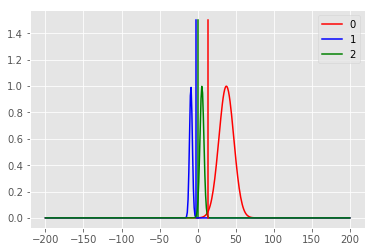

[-0.32711973 -2.06085431 -0.88322328]
[ 1.02524059  3.54849532  2.79486422]


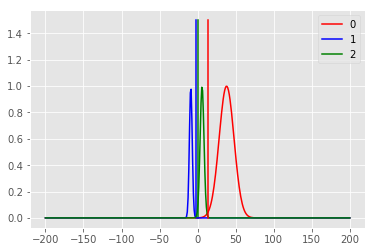

[-0.38145692 -2.40317857 -1.06807936]
[ 0.64378367  1.14531675  1.72678486]


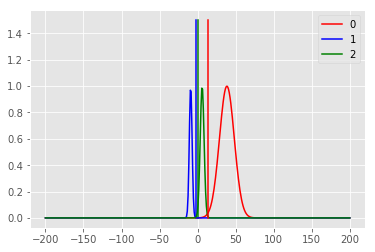

[-1.43909341 -7.05155771 -3.59773352]
[-0.79530974 -5.90624096 -1.87094867]


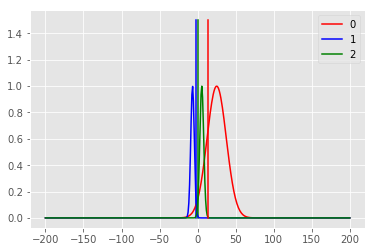

[-0.21905688 -1.38005833 -0.54764219]
[-1.01436661 -7.28629929 -2.41859086]


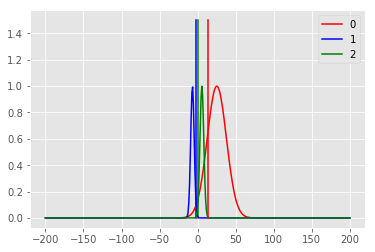

[ 0.54616352  3.82314463  1.74772326]
[-0.4682031  -3.46315466 -0.6708676 ]


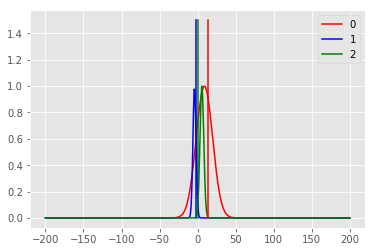

[-0.48301802 -3.13961711 -1.44905405]
[-0.95122111 -6.60277176 -2.11992165]


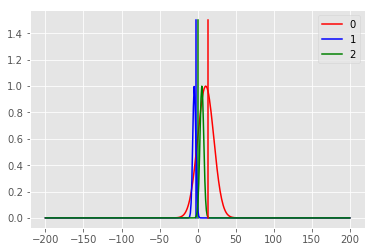

[ 0.22597233  1.35583397  0.76830592]
[-0.72524878 -5.24693779 -1.35161573]


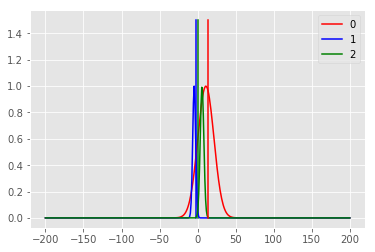

[ 0.0785072   0.37683458  0.24337233]
[-0.64674158 -4.87010322 -1.1082434 ]


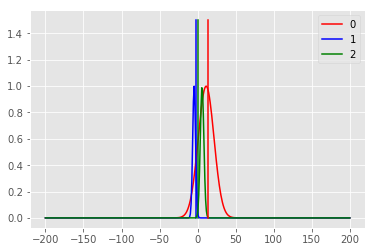

[-0.50003234 -2.90018757 -1.35008732]
[-1.14677392 -7.77029079 -2.45833072]


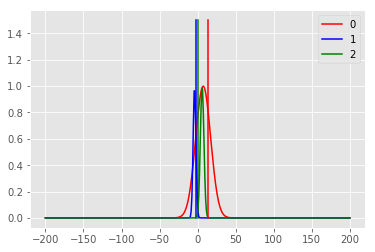

[ 0.4650777   2.60443512  1.25570979]
[-0.68169622 -5.16585567 -1.20262093]


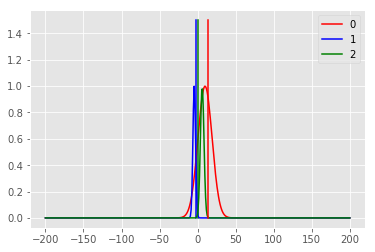

[ 0.31320004  1.7539202   0.90828011]
[-0.36849618 -3.41193547 -0.29434083]


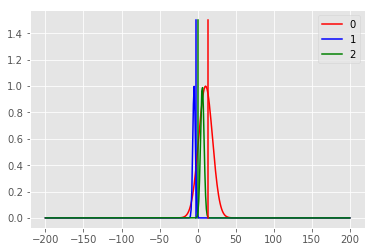

[ 0.48242544  2.65333994  1.20606361]
[ 0.11392926 -0.75859553  0.91172278]


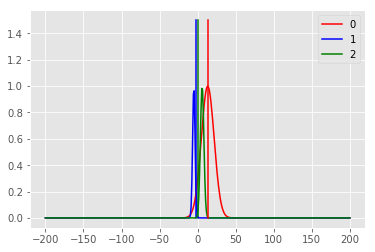

[ 0.4671634   2.84969673  1.40149019]
[ 0.58109266  2.0911012   2.31321298]


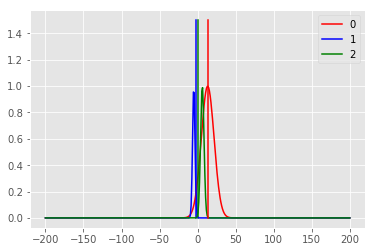

[-0.25080149 -1.80577069 -0.80256475]
[ 0.33029117  0.28533051  1.51064823]


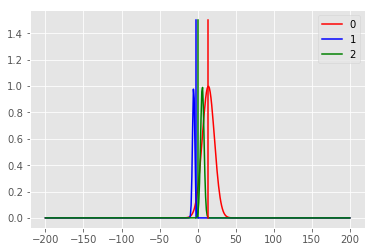

[ 0.01974681  0.10465807  0.07306318]
[ 0.35003798  0.38998858  1.5837114 ]


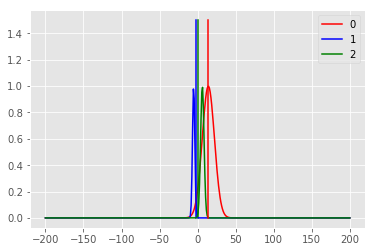

[ 0.01404306  0.06038518  0.04212919]
[ 0.36408104  0.45037375  1.6258406 ]


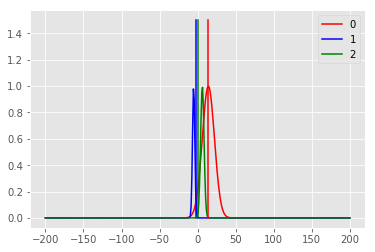

[-0.31051865 -1.98731937 -0.83840036]
[ 0.05356239 -1.53694561  0.78744024]


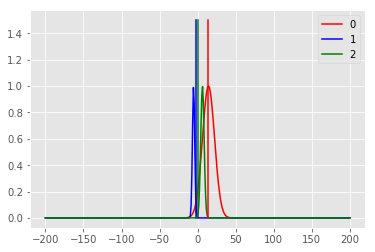

[ 0.21242056  1.2107972   0.63726168]
[ 0.26598295 -0.32614841  1.42470193]


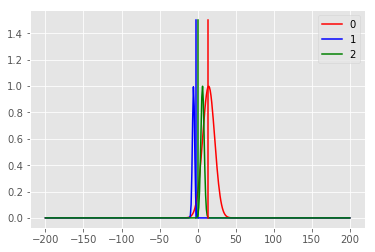

[ 0.02981112  0.16098006  0.10135781]
[ 0.29579407 -0.16516836  1.52605974]


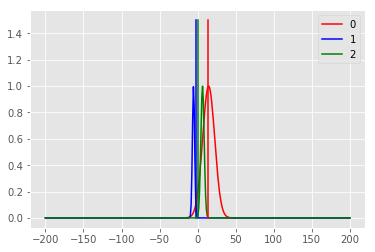

[ 0.01232815  0.07027046  0.05424386]
[ 0.30812222 -0.0948979   1.5803036 ]


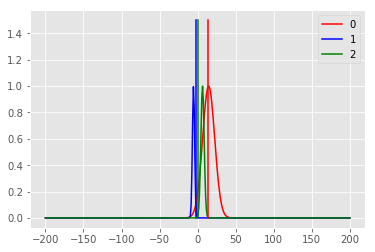

[ 0.56179387  3.87637772  1.74156101]
[ 0.8699161   3.78147982  3.32186461]


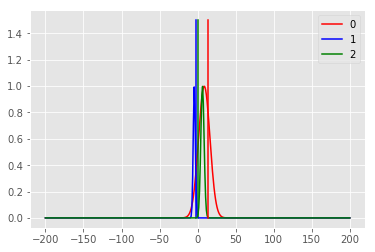

[ 0.02609787  0.12005019  0.08090339]
[ 0.89601396  3.90153001  3.40276799]


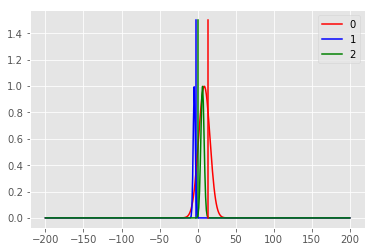

[-0.59572761 -3.51479291 -1.78718284]
[ 0.30028635  0.3867371   1.61558516]


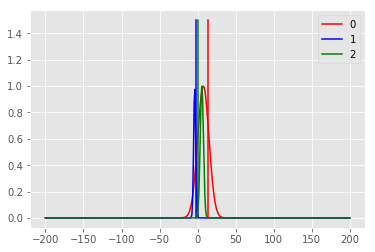

[ 0.37001339  1.88706829  0.92503348]
[ 0.67029974  2.27380539  2.54061863]


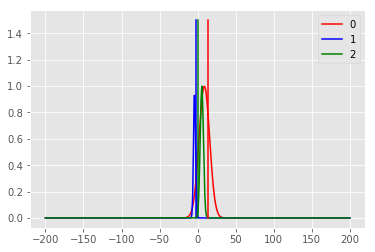

[ 0.02305283  0.10604301  0.07837961]
[ 0.69335257  2.3798484   2.61899825]


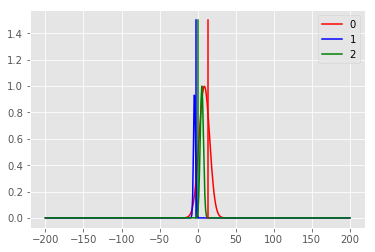

[ 0.58458229  3.62441022  1.28608104]
[ 1.27793486  6.00425862  3.90507929]


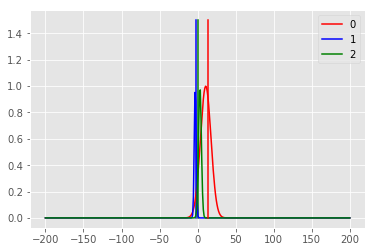

[-0.46289782 -3.33286428 -1.66643214]
[ 0.81503705  2.67139434  2.23864715]


KeyboardInterrupt: 

In [21]:
# Outer loop
mu, sig = ss_to_cov(r_new, A_new)
#plot_posterior(mu, sig)
tm1 = time.time()
for iteration in xrange(3): # max iterations
    print "Iteration ", iteration

    for i in xrange(N):

        
        ######################################################################################
        
        # 1 & 2 Try alternative projection with dimension reduction
        
        M_cavity, V_cavity = alt_project(data[i], r_old, A_old, r[i],A[i])      

        
        ######################################################################################

        # 3 compute moments
        
        M_new, V_new = compute_moments(y[i], M_cavity, V_cavity)
        #max_x = optimize.minimize(lambda x: -ll(x, y[i], M_cavity, V_cavity),  M_cavity)
        #M_new = max_x.x[0]
        #V_new = max_x.hess_inv[0][0]
        
        if V_new == 0:
            V_new = np.infty
            print " WARNING MATCHED VARIANCE IS 0\n"
            #break
            
        ######################################################################################

        # 4 remove updated factor from matched moments
        
        Mi_approx, Vi_approx = subtract_moments(M_new, V_new, M_cavity, V_cavity)
        
        deltar =  Mi_approx / Vi_approx - r[i]
        deltaA = 1./ Vi_approx - A[i]
        
        ######################################################################################

        # 5 store updated factor in 1 dimension
        
        r[i] = Mi_approx / Vi_approx
        A[i] = 1./ Vi_approx

        ######################################################################################

        # 6 project change in factor up
        
        deltar, deltaA = project_up(data[i], deltar, deltaA)

        ######################################################################################

        # 7 update posterior
        r_new = r_old + deltar
        A_new = A_old + deltaA


        ###################################################################################### 
        

        plot_posterior_1d_multi(r_old, A_old, r_new, A_new, r[i], A[i])
 
        r_old = r_new
        A_old = A_new

tm2 = time.time()
print "Time"
print tm2 - tm1

In [22]:
print "New posterior"
post_mu,post_sig = ss_to_cov(r_new, A_new)
print pd.DataFrame(post_mu)
print pd.DataFrame(post_sig)  

New posterior
           0
0  13.078569
1  -3.336213
2   2.658030
           0         1         2
0  38.754845 -5.443082 -1.772252
1  -5.443082  1.480294 -1.275033
2  -1.772252 -1.275033  3.354078


# Plot decision boundaries with samples

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[-2.60373147  0.74348327]
14.1981121787


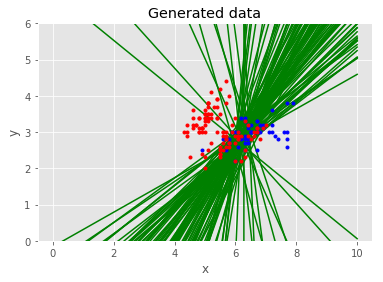

In [31]:
n_samples = 100
x = np.random.multivariate_normal(post_mu,post_sig , n_samples).T

intercepts = []
slopes = []
for i in range (0, n_samples):
    w0 = x[0][i]
    w1 = x[1][i]
    w2 = x[2][i]
    intercepts.append(-w0/w2)
    slopes.append(-w1/w2)
                      
x = np.linspace(0,10,100)

# get lines on x axis
intercepts = np.array(intercepts)
slopes = np.array(slopes)
abline_values = [slopes * i + intercepts for i in x]

# Plot the best fit line over the actual values
plt.plot(x, abline_values, 'g')

# iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
#X = X[0:100]
#Y = Y[0:100]

for i in range(0, len(Y)):
    if i>99:
        Y[i] = 0
    else: 
        Y[i] = 1
data = X
y = Y
#print X
print Y
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(data, y)
w_true = logreg.coef_[0]
w0_true = logreg.intercept_[0]
print w_true
print w0_true
plt.plot(data[y==other_label,0],data[y==other_label,1],"bo", markersize = 3)
plt.plot(data[y==1,0],data[y==1,1],"ro", markersize = 3)
#plt.plot(data[y==other_label],data[y==other_label],"bo", markersize = 3)
#plt.plot(data[y==1],data[y==1],"ro", markersize = 3)
plt.title("Generated data")
plt.xlabel("x")
plt.ylabel("y")

plt.ylim(0, 6)

plt.show()

# Plot decision boundaries with probit approximation

(2500, 2)


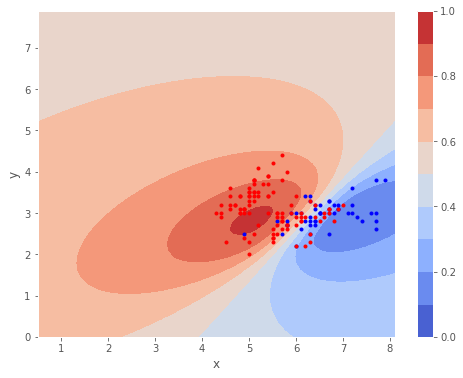

In [38]:
from scipy.special import expit
def predict_probit(X, mu, sigma):

    # probit approximation to predictive distribution
    ks = 1. / ( 1. + np.pi*sigma**2 / 8)**0.5
    prob = expit(mu*ks)

    return prob


#print y
# create grid for heatmap
x = data
n_grid = 50
max_x      = np.max(x,axis = 1)+3
min_x      = np.min(x,axis = 1)-3
X1         = np.linspace(min_x[0],max_x[0],n_grid)
X2         = np.linspace(min_x[1],max_x[1],n_grid)
x1,x2      = np.meshgrid(X1,X2)
Xgrid      = np.zeros([n_grid**2,2])
Xgrid[:,0] = np.reshape(x1,(n_grid**2,))
Xgrid[:,1] = np.reshape(x2,(n_grid**2,))

print Xgrid.shape
#eblr_grid = eblr.predict_proba(Xgrid)[:,1]
eblr_grid = []
for i in range (0,len(Xgrid)):
    
    # change basis
    #test_vec = np.array([1, Xgrid[i][0], Xgrid[i][1], Xgrid[i][0]*Xgrid[i][1], Xgrid[i][0]**2, Xgrid[i][1]**2])
    test_vec = np.array([1, Xgrid[i][0], Xgrid[i][1]])
    M_test, V_test = project_factor_subspace(test_vec, r_new, A_new)
    eblr_grid.append(predict_probit(test_vec, M_test, V_test))
    
eblr_grid = np.array(eblr_grid)


lev   = np.linspace(0,1,11)  
plt.figure(figsize=(8,6))
plt.contourf(X1,X2,np.reshape(eblr_grid,(n_grid,n_grid)),
             levels = lev,cmap=cm.coolwarm)
plt.plot(data[y==0,0],data[y==0,1],"bo", markersize = 3)
plt.plot(data[y==1,0],data[y==1,1],"ro", markersize = 3)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [52]:
iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features.
Y = iris.target
X = X[0:100]
Y = Y[0:100]

data, x_test, y, y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)
data = X
data = np.hstack((np.ones([data.shape[0],1]),data))
y = y
data.sort()
#print y
#print data

x_test = np.hstack((np.ones([x_test.shape[0],1]),x_test))

from scipy.special import expit
def predict_probit(X, mu, sigma):
    
    # probit approximation to predictive distribution
    ks = 1. / ( 1. + np.pi*sigma**2 / 8)**0.5
    prob = expit(mu*ks)

    return prob

# run test
acc = 0

for i in range(0, len(x_test)):
    test_vec = x_test[i]
    M_test, V_test = project_factor_subspace(test_vec, r_new, A_new)
    print predict_probit(test_vec, M_test, V_test)
    print y_test[i]
    if predict_probit(test_vec, M_test, V_test) > 0.5 and y_test[i]==1:
        acc = acc+1
        
print 1.*acc/len(x_test)
print acc
print len(x_test)

[[ 0.97432171]]
0
[[ 0.24414167]]
1
[[ 0.98285011]]
0
[[ 0.77212024]]
1
[[ 0.27032963]]
1
[[ 0.91252403]]
1
[[ 0.95289397]]
0
[[ 0.5287704]]
1
[[ 0.27093374]]
1
[[ 0.81637734]]
1
[[ 0.74429593]]
1
[[ 0.66158498]]
1
[[ 0.62919619]]
1
[[ 0.98824525]]
0
[[ 0.97432171]]
0
[[ 0.97831479]]
0
[[ 0.98498956]]
0
[[ 0.98156721]]
0
[[ 0.93979928]]
0
[[ 0.98614261]]
0
0.35
7
20
